# **Sentiment analysis using pre-trained *Bert-base-multilingual-uncased-sentiment* model** 
**Source:** https://huggingface.co/blog/sentiment-analysis-python   
  
**Dataset description:** Bert-base-multilingual-uncased-sentiment is a model fine-tuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).

**Link do dataset:** https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment

In [80]:
# Required modules
!pip install -q transformers
from transformers import pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# Extract opinion and and number of stars from each line of .txt file
def extract_stars_and_opinion(filename):
  with open(filename) as file:
      lines = [line.rstrip() for line in file]

  stars_amazon_list = []
  opinion_amazon_list = []
  for index, element in enumerate(lines):
    stars_amazon = float(lines[index][1:-1].split(',')[1][2:5])
    opinion_amazon = str(lines[index][1:-1].split(',')[2][4:-3])
    stars_amazon_list.append(stars_amazon)
    opinion_amazon_list.append(opinion_amazon)

  return stars_amazon_list, opinion_amazon_list

# Convert number of stars to positive/negative/neutral
def stars_to_adjective(stars_list):
  adjective_amazon_list = []
  for score in stars_list:
    if score < 3.0:
      adjective_amazon_list.append('negative')
    elif score == 3.0:
      adjective_amazon_list.append('neutral')
    elif score > 3.0:
      adjective_amazon_list.append('positive')

  return adjective_amazon_list

# **Frequency Distribution**

In [82]:
# Web scraping data in .txt files
files = ["B07PXZXVLJ.txt", "B081TR57TK.txt", "B08GKZHC37.txt", "B08WQRDSRQ.txt"]

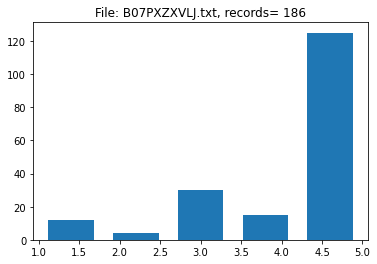

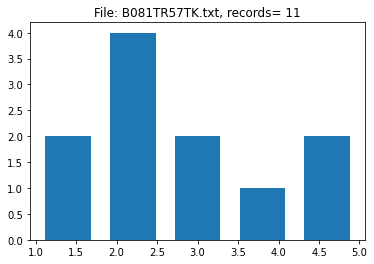

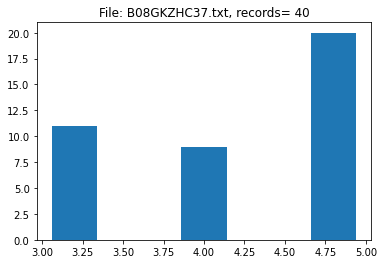

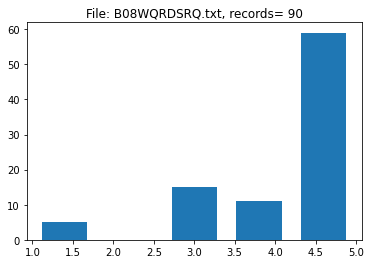

In [83]:
for index, filename in enumerate(files):
  stars_to_plot, _ = extract_stars_and_opinion(filename)
  plt.title("File: " + filename + ", records= " + str(len(stars_to_plot)))
  plt.hist(stars_to_plot, bins=5, rwidth=0.7)
  plt.show()

In [84]:
for idx, filename in enumerate(files):

  stars_amazon_list, opinion_amazon_list = extract_stars_and_opinion(filename)

  # Perform sentiment analysis using pre-trained BERT model
  sentiment_pipeline = pipeline(model="nlptown/bert-base-multilingual-uncased-sentiment")
  data = opinion_amazon_list
  result = sentiment_pipeline(data)

  # Calculate metrics (accuracy) 
  predictions=[]
  for element in result:
    predictions.append(float(element['label'][0]))
  print(filename, " accuracy: ", accuracy_score(stars_amazon_list, predictions))


B07PXZXVLJ.txt  accuracy:  0.478494623655914
B081TR57TK.txt  accuracy:  0.5454545454545454
B08GKZHC37.txt  accuracy:  0.4
B08WQRDSRQ.txt  accuracy:  0.5111111111111111


# **Sentiment analysis using Googles Bert architecture trained on 1.834 million samples** 
**Source:** https://github.com/oliverguhr/german-sentiment-lib   
  
**Dataset description:** The training data contains texts from various domains like Twitter, Facebook and movie, app and hotel reviews.



In [85]:
# Required modules
!pip install germansentiment
from germansentiment import SentimentModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:

for idx, filename in enumerate(files):

  stars_amazon_list, opinion_amazon_list = extract_stars_and_opinion(filename)

  adjective_amazon_list = stars_to_adjective(stars_amazon_list)

  model = SentimentModel()

  texts = opinion_amazon_list
        
  result = model.predict_sentiment(texts)

  print(filename, " accuracy: ", accuracy_score(adjective_amazon_list, result))



B07PXZXVLJ.txt  accuracy:  0.553763440860215
B081TR57TK.txt  accuracy:  0.36363636363636365
B08GKZHC37.txt  accuracy:  0.5
B08WQRDSRQ.txt  accuracy:  0.5
